In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

Accuracy: 0.8803803803803804
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       208
           1       0.60      1.00      0.75       203
           2       0.92      0.83      0.87       186
           3       0.97      0.85      0.91       199
           4       0.96      0.88      0.92       218
           5       0.93      0.85      0.89       192
           6       0.98      0.97      0.97       204
           7       0.87      0.91      0.89       180
           8       0.94      0.89      0.91       211
           9       0.94      0.80      0.86       197

    accuracy                           0.88      1998
   macro avg       0.90      0.88      0.88      1998
weighted avg       0.90      0.88      0.89      1998



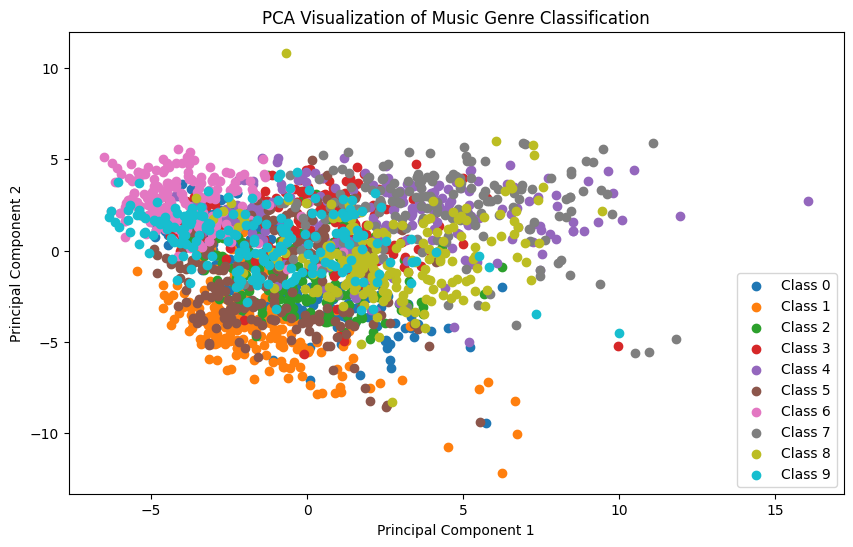

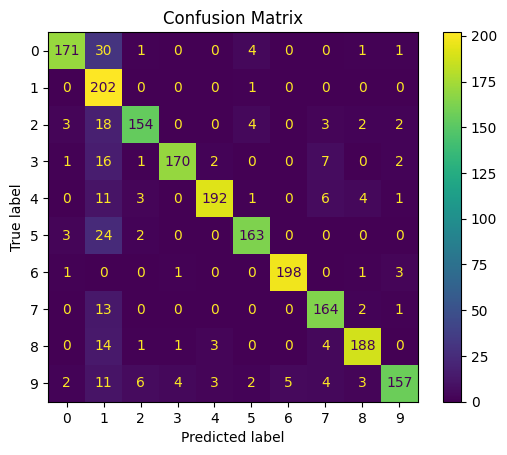

In [4]:
data = pd.read_csv('Data/features_3_sec.csv')
# Drop filename column if not needed
data = data.drop(['filename'], axis=1)

# Encode the labels
y = LabelEncoder().fit_transform(data['label'])
data = data.drop(['label'], axis=1)

# Features (X) and target (y)
X = data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the SVM model
svm_model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize the classification results using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(set(y))):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=f"Class {i}")
plt.title("PCA Visualization of Music Genre Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


# Confusion matrix visualization
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=LabelEncoder().fit(y).classes_, cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


In [3]:
# Load the dataset (replace 'dataset.csv' with your dataset's filename)
data = pd.read_csv('Data/features_3_sec.csv')

# Filter the dataset for two specific genres (e.g., 'class1' and 'class2')
data = data[data['label'].isin(['blues', 'classical'])]  # Replace 'class1' and 'class2' with actual genre names

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])
classes = label_encoder.classes_

# Drop the label column to leave features
X = data.drop(['label', 'filename'], axis=1, errors='ignore')  # Exclude non-feature columns

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # Predict the label for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary using PCA Features")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_pca, y, svm_model)

NameError: name 'np' is not defined

In [ ]:
def SVM(X_train, y_train, learning_rate=0.01, lambda_param=0.01, num_iterations=2000):
    """
    Custom SVM implementation using gradient descent.

    Parameters:
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        learning_rate (float): Learning rate for gradient descent.
        lambda_param (float): Regularization parameter.
        num_iterations (int): Number of iterations for training.

    Returns:
        weights (np.ndarray): Optimized weights.
        bias (float): Optimized bias.
    """
    num_samples, num_features = X_train.shape
    weights = np.zeros(num_features)
    bias = 0

    for iteration in range(num_iterations):
        for i in range(num_samples):
            condition = y_train[i] * (np.dot(X_train[i], weights) + bias) >= 1
            if condition:
                weights -= learning_rate * (2 * lambda_param * weights)
            else:
                weights -= learning_rate * (2 * lambda_param * weights - np.dot(X_train[i], y_train[i]))
                bias -= learning_rate * y_train[i]

    return weights, bias

def plot_decision_boundary(X, y, weights, bias):
    """
    Plot the SVM decision boundary.

    Parameters:
        X (np.ndarray): Feature set.
        y (np.ndarray): Labels.
        weights (np.ndarray): SVM weights.
        bias (float): SVM bias.
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contour(xx, yy, Z, levels=[0], colors='black', linewidths=2)  # Main decision boundary
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary using Custom Implementation (Single Line)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Load the dataset
data = pd.read_csv('Data/features_3_sec.csv')

# Filter the dataset for two specific genres (e.g., 'pop' and 'rock')
data = data[data['label'].isin(['blues', 'classical'])]  # Replace 'pop' and 'rock' with actual genres

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])  # Encode 'pop' as 0 and 'rock' as 1

# Drop the label column to leave features
X = data.drop(['label', 'filename'], axis=1, errors='ignore')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the custom SVM model
weights, bias = SVM(X_train, y_train)

# Plot the decision boundary
plot_decision_boundary(X_train, y_train, weights, bias)


In [ ]:
weights, bias = SVM(X_train, y_train)
print(weights, bias)

[-63.96553229  -9.50927722] -15982.47000030244


In [ ]:
data = pd.read_csv('Data/features_3_sec.csv')

# Filter the dataset for two specific genres (e.g., 'pop' and 'rock')
data = data[data['label'].isin(['blues', 'classical'])]  # Replace 'pop' and 'rock' with actual genres

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])  # Encode 'pop' as 0 and 'rock' as 1

# Drop the label column to leave features
X = data.drop(['label', 'filename'], axis=1, errors='ignore')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

weights, bias = SVM(X_train, y_train)
print(weights, bias)


[-63.96553229  -9.50927722] -15982.47000030244


In [ ]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias
Z = Z.reshape(xx.shape)


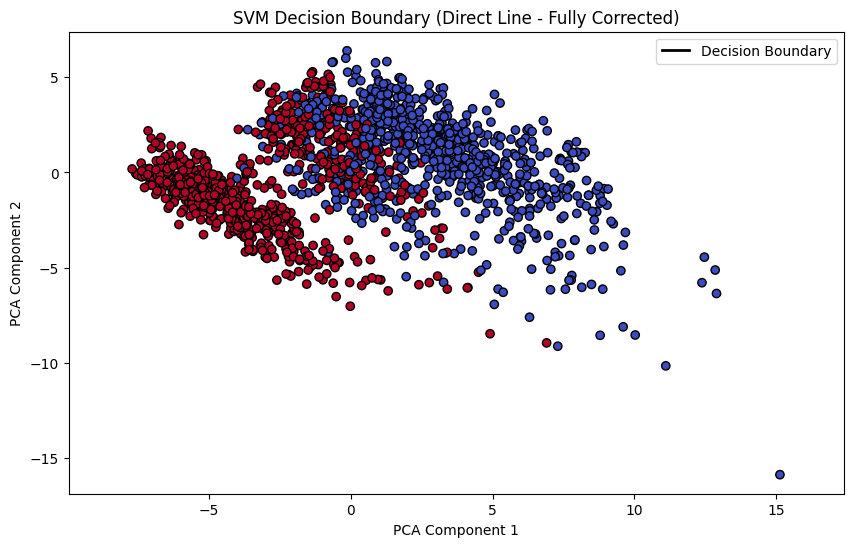

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

def SVM(X_train, y_train, learning_rate=0.001, lambda_param=0.01, num_iterations=2000):
    """
    Custom SVM implementation using gradient descent.

    Parameters:
        X_train (np.ndarray): Training features.
        y_train (np.ndarray): Training labels.
        learning_rate (float): Learning rate for gradient descent.
        lambda_param (float): Regularization parameter.
        num_iterations (int): Number of iterations for training.

    Returns:
        weights (np.ndarray): Optimized weights.
        bias (float): Optimized bias.
    """
    num_samples, num_features = X_train.shape
    weights = np.zeros(num_features)
    bias = 0

    for iteration in range(num_iterations):
        for i in range(num_samples):
            condition = y_train[i] * (np.dot(X_train[i], weights) + bias) >= 1
            if condition:
                weights -= learning_rate * (2 * lambda_param * weights)
            else:
                weights -= learning_rate * (2 * lambda_param * weights - y_train[i] * X_train[i])
                bias -= learning_rate * y_train[i]

    return weights, bias


def plot_decision_boundary_direct(X, y, weights, bias):
    """
    Plot the decision boundary directly from weights and bias.

    Parameters:
        X (np.ndarray): Feature set.
        y (np.ndarray): Labels.
        weights (np.ndarray): SVM weights.
        bias (float): SVM bias.
    """
    plt.figure(figsize=(10, 6))

    # Scatter plot of the data
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

    # Calculate the decision boundary line
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1 = np.linspace(x_min, x_max, 100)
    if weights[1] != 0:  # Avoid division by zero
        x2 = -(weights[0] / weights[1]) * x1 - (bias / weights[1])
    else:
        x2 = np.full_like(x1, -bias / weights[0])  # Vertical line

    # Ensure decision boundary is within the plot range
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    plt.ylim(y_min, y_max)

    # Plot the decision boundary
    plt.plot(x1, x2, color='black', linewidth=2, label='Decision Boundary')

    plt.title("SVM Decision Boundary (Direct Line - Fully Corrected)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()


# Load the dataset
data = pd.read_csv('Data/features_3_sec.csv')

# Filter the dataset for two specific genres (e.g., 'pop' and 'rock')
data = data[data['label'].isin(['pop', 'rock'])]  # Replace 'pop' and 'rock' with actual genres

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['label'])  # Encode 'pop' as 0 and 'rock' as 1

# Convert labels to +1 and -1 for SVM
y = np.where(y == 0, -1, 1)

# Drop the label column to leave features
X = data.drop(['label', 'filename'], axis=1, errors='ignore')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the custom SVM model
weights, bias = SVM(X_train, y_train)

# Plot the decision boundary
plot_decision_boundary_direct(X_train, y_train, weights, bias)